In [2]:
import pandas as pd

In [3]:
data= pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
#index_col=0 sets the col 0 of the data set as the index col

In [4]:
data.head(5)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [6]:
data.shape

(200, 4)

In [7]:
#sales is the target var.
import seaborn as sns
%matplotlib inline

%matplotlib inline

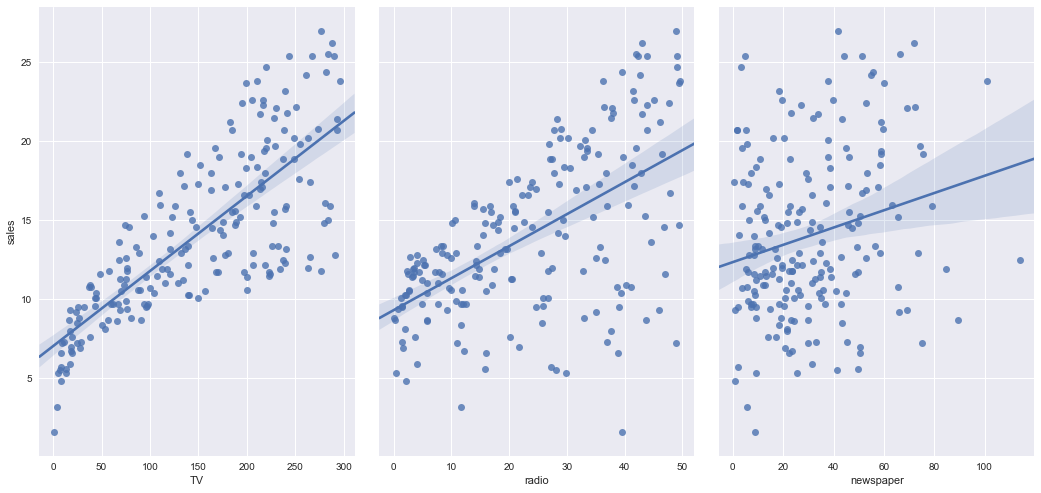

In [8]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales',size=7,aspect=0.7,kind='reg')
#pairplot gives us a scattered plot of every mentioned feature with the target var
#aspect increases the resolution
#size increases the size/area of just the plot
#checking the corelation between the vars
#kind='reg'gives line of best fit , reg refers to regression

In [9]:
#feature matrix... X. response vector....Y
feature_Cols=['TV','radio','newspaper']
X=data[feature_Cols]

X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [10]:
type(X)

pandas.core.frame.DataFrame

In [11]:
X.shape

(200, 3)

In [12]:
Y=data[['sales']]

In [13]:
Y.head()

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


In [14]:
type(Y)
Y.shape

(200, 1)

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,random_state=1)
#default split ration is 75 fr train , 25 fr test

C:\Users\Rishika\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(150, 3)
(50, 3)
(150, 1)
(50, 1)


In [17]:
X_train.head()

,TV,radio,newspaper
99,289.7,42.3,51.2
124,123.1,34.6,12.4
120,19.4,16.0,22.3
54,182.6,46.2,58.7
34,265.6,20.0,0.3


In [18]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
LR=LinearRegression()
#making the model learn the relationship... this is the model training process... learning the cofficients
LR.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print (LR.intercept_)

[ 2.87696662]


In [20]:
LR.coef_

array([[ 0.04656457,  0.17915812,  0.00345046]])

In [21]:
zip(feature_Cols,LR.coef_)

In [22]:
#predicting phase after the training phase
y_pred=LR.predict(X_test)

In [25]:
import numpy as np
from sklearn import metrics

In [27]:
print (np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

1.40465142303


In [52]:
#as newspaer has avery weak relationship with sale, we remove it
feature_Cols=['TV','radio']

In [53]:
X=data[feature_Cols]

In [54]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,random_state=1)

In [55]:
LR.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
y_pred=LR.predict(X_test)

In [57]:
print (np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

1.38790346994
